In [179]:
import json
import io 
import IPython.display
import os 
import base64
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [185]:
## definition statement, helper functions

def getx(p):
    
    return p[u'x']

def gety(p):
    return p[u'y']

def plotstroke(onestroke,onecolor):
    print onestroke
    xs = map(getx,onestroke)
    ys = map(gety,onestroke)
    ## draw dots where the child's touched the screen up to now
    ySizeOfImage = 500
    xSizeOfImage = 500
    plot(xs,ys, 
      lw = 3, color = onecolor)
    axis('off')
    yticks([])
    xticks([])
    xlim(0,xSizeOfImage)
    ylim(0,ySizeOfImage)

#ray
def plotstroke_new(ax,onestroke,onecolor,file_ind):
    print onestroke
    xs = map(getx,onestroke)
    ys = map(gety,onestroke)
    ySizeOfImage = 500
    xSizeOfImage = 500
    assert(len(xs) == len(ys))
    for i in range(len(xs)):
        x, y = xs[:i], ys[:i]
        ax.plot(x,y,lw=3, color=onecolor)
#         yticks([])
#         xticks([])
#         xlim(0,xSizeOfImage)
#         ylim(0,ySizeOfImage)
#         show()
#        savefig('/Users/cocosci/Desktop/ray_out/%02d_%03d_%s' %(file_ind, i, onecolor))
# this works below 
        savefig('/Users/cocosci/Desktop/ray_out/image%02d_%03d' %(file_ind, i))
#        savefig('/Users/cocosci/Desktop/ray_out/image%02d' %(i)) 

def flatList(l):
    return [item for sublist in l for item in sublist]

def makeimage(letter,filename):

    strokeColors = ["blue","red","green","yellow","magenta","black"]
    strokes = letter[u'strokes']
    f = figure() # ray
    ax = f.gca() # ray
    yticks([])
    xticks([])
    xlim(0,500)
    ylim(0,500)
    allX = []
    allY = []
    for i in range(len(strokes)):
        color = strokeColors[i]
        stroke = strokes[i]
        xs = map(getx, stroke)
        ys = map(gety, stroke)
        allX.append(xs)
        allY.append(ys)
#         plotstroke(stroke,color)
        plotstroke_new(ax, stroke,color,i) # ray
#         show()
    allX = flatList(allX)
    allY = flatList(allY)
    jointXY = array([allX, allY]).transpose()
    savetxt(directoryToImages + "data.csv", jointXY, delimiter=",")
    savefig(filename)
   

In [192]:
dataFolder = '/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/GH_Data/'
fp = io.open('/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/GH_Data/11_11_16/Part12_Draw.json')
d = json.load(fp)
directoryToImages = "/Users/cocosci/Desktop/ray_out/"


In [191]:
fp

<_io.TextIOWrapper name='/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/GH_Data/11_11_16/Part12_Draw.json' encoding='UTF-8'>

In [181]:
def getdata(f):
    fp = io.open(f)
    return json.load(fp)

In [182]:
#Change number here 0-7 to get specific kids drawing also makeimage(d[7],<-- this number, 1st num
# t = d[2][u'strokes'][0]   


0 [{u'y': 139, u'x': 91, u't': u'2016-11-10T17:50:27.635Z'}, {u'y': 129, u'x': 89, u't': u'2016-11-10T17:50:27.676Z'}, {u'y': 124, u'x': 89, u't': u'2016-11-10T17:50:27.681Z'}, {u'y': 121, u'x': 90, u't': u'2016-11-10T17:50:27.694Z'}, {u'y': 119, u'x': 93, u't': u'2016-11-10T17:50:27.709Z'}, {u'y': 117, u'x': 95, u't': u'2016-11-10T17:50:27.726Z'}, {u'y': 117, u'x': 98, u't': u'2016-11-10T17:50:27.743Z'}, {u'y': 117, u'x': 99, u't': u'2016-11-10T17:50:27.76Z'}, {u'y': 117, u'x': 100, u't': u'2016-11-10T17:50:27.776Z'}, {u'y': 119, u'x': 100, u't': u'2016-11-10T17:50:27.793Z'}, {u'y': 121, u'x': 101, u't': u'2016-11-10T17:50:27.812Z'}, {u'y': 124, u'x': 101, u't': u'2016-11-10T17:50:27.826Z'}, {u'y': 126, u'x': 102, u't': u'2016-11-10T17:50:27.843Z'}, {u'y': 128, u'x': 103, u't': u'2016-11-10T17:50:27.86Z'}, {u'y': 130, u'x': 104, u't': u'2016-11-10T17:50:27.877Z'}, {u'y': 131, u'x': 105, u't': u'2016-11-10T17:50:27.893Z'}, {u'y': 132, u'x': 106, u't': u'2016-11-10T17:50:27.91Z'}, {u'y'

ValueError: object too deep for desired array

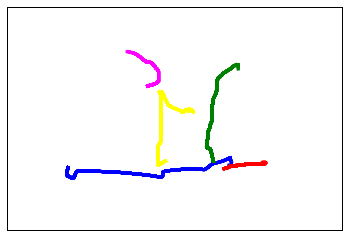

In [188]:
#Change number here 0-7 to get specific kids drawing also makeimage(d[7],<-- this number, 1st num
numOfPics = 8
for withinChildIterator in range(numOfPics):
    print withinChildIterator,
    t = d[withinChildIterator][u'strokes'][0]  
    makeimage(d[withinChildIterator],
              '/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/testek.png')        

In [184]:
#Makes movie and gif
directoryToImages = "/Users/cocosci/Desktop/ray_out/"
os.system("ffmpeg -framerate 30 -pattern_type glob -i '" + directoryToImages + \
           "*.png' -c:v libx264 -pix_fmt yuv420p " + directoryToImages + "out.mp4")

os.system("convert -delay 1.5 " + directoryToImages +  \
           "/*.png " + directoryToImages + "tout.gif")

0

In [ ]:
#onestroke = d[3]['strokes'][0]
#map(getx,onestroke)
